In [1]:
#load aiida environment and connect to database
from aiida import load_profile
from aiida.orm import computers
profile = load_profile()
print('profile name : ',profile.name)
print('profile database host name : ',profile.database_hostname)
print('default user : ',profile.default_user)

profile name :  default
profile database host name :  localhost
default user :  r.mozumder@fz-juelich.de


In [2]:
# load classes and functions
from aiida.orm import CifData, Code, Dict, load_node, StructureData 
from aiida.orm import (Group, load_group, load_node, load_code, groups,
                      WorkChainNode)
from aiida.engine import submit
from aiida.common.exceptions import NotExistent
from aiida_kkr.workflows import kkr_imp_sub_wc, kkr_imp_dos, kkr_imp_wc, kkr_startpot_wc
import numpy as np
from aiida_kkr.calculations import KkrimpCalculation, VoronoiCalculation
import matplotlib.pyplot as plt
from aiida_kkr.tools.common_workfunctions import get_username

In [3]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals
from builtins import object, str
from six.moves import range
from six.moves import input
from masci_tools.io.common_functions import open_general
from masci_tools.io.common_functions import search_string
import numpy as np
from masci_tools.io.common_functions import get_alat_from_bravais
from masci_tools.io.common_functions import vec_to_angles
from aiida.common.constants import elements as PeriodicTableElements
_atomic_numbers = {data['symbol']:num for num,
                data in PeriodicTableElements.items()}
load_stuc = load_node(234)
load_stuc

<StructureData: uuid: c1626804-5b71-450c-91c4-aa7197d85279 (pk: 234)>

In [41]:
node_16215 = load_node(16215)
node_16100 = load_node(16100)
node_16215.outputs.
# node_16100.outputs.workflow_info.pk

SyntaxError: invalid syntax (<ipython-input-41-9dca4e44ca7d>, line 3)

In [ ]:
# imp_dos_group = load_group(72)

plt.figure()
for i, imp_dos in enumerate(imp_dos_group.nodes[2:4]):
    # plot the contribution of the total impurity cluster into the background
    # we scale this down by 0.5 to have copatible y-scales
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=None,
             noshow=True, nofig=True, color='C'+str(i),
             filled=True, alpha=0.3, yscale=0.5, lw=3
            )
    # highlight the contibution of the impurity (iatom=0)
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
             noshow=True, nofig=True, color='C'+str(i),
             lw=3, iatom=0, 
            )
plt.legend(loc=2, fontsize='large')
plt.title('')
plt.show()

In [ ]:
# imp_dos_group = load_group(72)

plt.figure()
for i, imp_dos in enumerate(imp_dos_group.nodes[2:4]):
    # plot the contribution of the total impurity cluster into the background
    # we scale this down by 0.5 to have copatible y-scales
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=None,
             noshow=True, nofig=True, color='C'+str(i),
             filled=True, alpha=0.3, yscale=0.5, lw=3
            )
#     # highlight the contibution of the impurity (iatom=0)
#     plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
#              noshow=True, nofig=True, color='C'+str(i),
#              lw=3, iatom=0, 
#             )
plt.legend(loc=2, fontsize='large')
plt.title('')
plt.show()

No handles with labels found to put in legend.


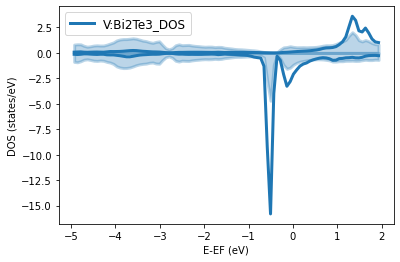

In [138]:
plt.figure()
for i, imp_dos in enumerate(imp_dos_group.nodes[3:4]):
    # plot the contribution of the total impurity cluster into the background
    # we scale this down by 0.5 to have copatible y-scales
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=None,
             noshow=True, nofig=True, color='C'+str(i),
             filled=True, alpha=0.3, yscale=0.5, lw=3
            )
    # highlight the contibution of the impurity (iatom=0)
    plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
             noshow=True, nofig=True, color='C'+str(i),
             lw=3, iatom=0, 
            )
plt.legend(loc=2, fontsize='large')
plt.title('')
plt.show()

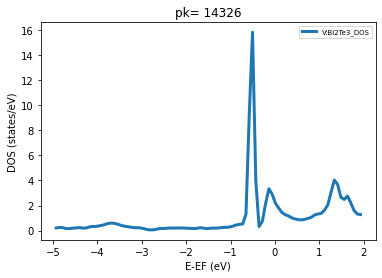

In [139]:
 plot_kkr(imp_dos, l_channels=False, strucplot=False, silent=True, label=imp_dos.label,
             noshow=True, nofig=True, color='C'+str(i),
             lw=3, iatom=0,all_atoms= False, sum_spins= True,)

In [140]:
#imp_kkr_wc = 10085
imp_out = load_node(11948)
# kkrimp_calc = imp_out.outputs.last_calc_output_parameters.get_incoming(KkrimpCalculation).all()
# imp_info = imp_out.outputs.workflow_info.get_incoming(link_label_filter='workflow_info').all()
# # print(imp_info[0].node)
# print(kkrimp_calc[0].node)
ldau_test = imp_out.outputs.workflow_info.get_dict()
# ldau_test

In [274]:
kkr = None
if kkr == None:
    print('ok')

ok


In [261]:
####### NOTE: If this csucessful then please add it into the 'tools_development' ipynb
## In this part the node has been collected to store in new group only considering the kkr_imp_wc node
group_wasmer = load_group(83)
# node_label
debug= False
wasmer_grp_list = list(group_wasmer.nodes)
group_label = 'imp_embedded_Au_by_wasmer'
try:
    new_grp = load_group(node_label)
    print('Group as named %s is already stored, so no need to create the group'%(node_label))
except:
    new_grp = Group(label=group_label)
    new_grp.store()
    print(' A new node created as named %s' %node_label)
new_grp_list = list(new_grp.nodes)
i=0
imp_wc_no = 0
for index in range(len(wasmer_grp_list)):
    node = wasmer_grp_list[index]
    if node.node_type.split('.')[-2]=='WorkChainNode':
        if (u'kkr_imp_wc' == node.process_label):
            imp_wc_no += 1
            if node in new_grp_list[:]:
                print('node {} is already exist'.format(node.pk))
            else:
                new_grp.add_nodes(node)
            if debug:
                print(node.process_label)
                print('pk: %7d'%node.pk)
                print(wasmer_grp_list[i])
                print(node.label)
                
                        
        

print(imp_wc_no)

Group as named imp_embedded_Au_by_wasmer is already stored, so no need to create the group
39


In [15]:
node_20370 = load_node(20693)
node_20370.inputs.parameters.get_dict()

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 0,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': None,
 'MIXFAC': 1e-05,
 'QBOUND': 0.005,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 300,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': None,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [27]:
node_20365 = load_node(16336)
node_20365.inputs.wf_parameters.get_dict()

{'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 0.02,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': True,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.5}

In [26]:
node_20365 = load_node(16492)
wc = node_20365.get_incoming(node_class=kkr_imp_sub_wc).first().node.get_incoming(node_class=kkr_imp_wc).first().node
wc.inputs.wf_parameters.get_dict()

{'lmdos': True,
 'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 0.02,
 'aggrmix': 0.05,
 'dos_run': False,
 'jij_run': False,
 'init_pos': None,
 'mag_init': True,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'nsimplemixfirst': 0,
 'do_final_cleanup': True,
 'retrieve_kkrflex': False,
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.5}

<WorkChainNode: uuid: c42b89d5-4af1-4177-b030-d877cc8c7bd0 (pk: 16195) (aiida.workflows:kkr.imp)>

In [29]:
node_20688 = load_node(20688) # kkr_imp_sub_w
node_20693 = load_node(20693)# calc job
node_20688.inputs.wf_parameters.get_dict()

{'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 1e-05,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.005,
 'threshold_switch_high_accuracy': 0.01}

In [30]:

node_20693.inputs.parameters.get_dict()

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 0,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': None,
 'MIXFAC': 1e-05,
 'QBOUND': 0.005,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 300,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': None,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [70]:
node_20331 = load_node(20331)


<Computer: claix18_init (localhost), pk: 2>

In [63]:
path = node_20331.get_remote_workdir()
new_path = path.replace('/'+path.split('/')[-1], '')


In [139]:
path #'/rwthfs/rz/cluster/work/jara0191/ck142666/aiida/computers/claix18_init/43/38/b73e-af13-4035-aa57-efd943dea5fd


'/rwthfs/rz/cluster/work/jara0191/ck142666/aiida/computers/claix18_init/43/38/b73e-af13-4035-aa57-efd943dea5fd'

In [64]:
new_path

'/rwthfs/rz/cluster/work/jara0191/ck142666/aiida/computers/claix18_init/43/38'

In [141]:
from aiida.orm import computers

computer = node_20331.computer
computer_name = computer.label
computer_dir = computer.get_workdir()
conection_to_computer = computer.get_transport()
from aiida.manage.database.delete.nodes import delete_nodes

conection_to_computer.open()
conection_to_computer.is_open

conection_to_computer.rmtree(new_path)
#https://aiida.readthedocs.io/projects/aiida-core/en/v1.5.0/_modules/aiida/manage/database/delete/nodes.html

# node_20354 = load_node(16152)

True

In [138]:
node_20354 = load_node(20531)
dict_1 = node_20354.inputs.parameters.get_dict()
dict_1

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 0,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': None,
 'MIXFAC': 0.02,
 'QBOUND': 0.5,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 300,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': None,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [131]:
node_20354 = load_node(16492)
dict_1 = node_20354.inputs.parameters.get_dict()
dict_1

{'XC': None,
 'INS': 1,
 'ICST': None,
 'IMIX': 5,
 'KVREL': None,
 'NCHEB': None,
 'NCOLL': 1,
 'NSPIN': 2,
 'BRYMIX': None,
 'HFIELD': [0.0, 0],
 'ITDBRY': 20,
 'MIXFAC': 0.05,
 'QBOUND': 1e-07,
 'NPAN_EQ': None,
 'RUNFLAG': None,
 'IMIXSPIN': None,
 'NPAN_LOG': None,
 'SCFSTEPS': 300,
 'TESTFLAG': ['tmatnew'],
 'CALCFORCE': None,
 'SPINORBIT': 1,
 'CALCJIJMAT': None,
 'RADIUS_MIN': None,
 'QBOUND_LDAU': None,
 'NSIMPLEMIXFIRST': 0,
 'NPAN_LOGPANELFAC': None,
 'RADIUS_LOGPANELS': None,
 'CALCORBITALMOMENT': 1}

In [10]:
node_20464 = load_node(20560)
param = node_20464.inputs.wf_parameters.get_dict()
param

{'lmdos': False,
 'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 0.005,
 'aggrmix': 0.05,
 'jij_run': True,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.05}

In [13]:
node_20464 = load_node(20595)
param = node_20464.inputs.wf_parameters.get_dict()
param

{'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 0.0001,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.05}

In [11]:
node_20464 = load_node(16336)
param = node_20464.inputs.wf_parameters.get_dict()
param

{'hfield': [0.02, 5],
 'nsteps': 300,
 'strmix': 0.02,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': True,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 20,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.5}

In [41]:
node_20565 = load_node(21165)
node_20565.outputs.output_parameters.get_dict()

{'nspin': 2,
 'energy': -1937931.0075489,
 'energy_unit': 'eV',
 'fermi_energy': 0.8666390209,
 'timings_unit': 'seconds',
 'use_newsosol': True,
 'parser_errors': [],
 'timings_group': {'energyloop': 229.03187667847,
  'gref->gmat': 0.48537500008941,
  'Iteration number': 230.47137588501,
  'gonsite->density': 54.147818870544,
  'Total running time': 23062.359375,
  'time until scf starts': 15.192000389099},
 'parser_version': '0.4.2',
 'warnings_group': {'warnings_list': [], 'number_of_warnings': 0},
 'code_info_group': {'code_version': 'v3.1-1679-g1fae947',
  'compile_options': 'intel',
  'calculation_serial_number': '20210310220735'},
 'magnetism_group': {'spin_moment_unit': 'mu_Bohr',
  'total_spin_moment': -0.038266,
  'orbital_moment_unit': 'mu_Bohr',
  'spin_moment_per_atom': [[1.0671554663581e-08,
    3.0622747044108e-08,
    -0.0042697727972428],
   [-1.9939264277978e-06, 1.7801690709954e-06, -4.8875609289789e-05],
   [1.0969941499947e-07, 5.5965451878255e-09, -1.409089318515

In [38]:
node_21148 = load_node(21148)
node_21148.inputs.wf_parameters.get_dict()

{'hfield': [0.02, 5],
 'nsteps': 100,
 'strmix': 6e-05,
 'aggrmix': 0.05,
 'init_pos': None,
 'mag_init': False,
 'mixreduce': 0.5,
 'kkr_runmax': 5,
 'aggressive_mix': 5,
 'broyden-number': 60,
 'accuracy_params': {'NCHEB': None,
  'NPAN_EQ': None,
  'NPAN_LOG': None,
  'RADIUS_LOGPANELS': None},
 'convergence_criterion': 1e-07,
 'threshold_aggressive_mixing': 0.0005}